# 1. Install and Import Dependencies

In [1]:
!conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\ADMIN/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-1-2 torch 1.10.1 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections with Images

In [7]:
img = 'https://vcdn-english.vnecdn.net/2016/11/24/Motorbikestrytoweavetheirwaybe-6460-3530-1479955800_1200x0.jpg'

In [8]:
results = model(img)
results.print()

C:\Users\ADMIN\anaconda3\envs\pytorch\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
image 1/1: 732x1100 15 persons, 15 cars, 6 motorcycles, 4 buss, 3 trucks, 1 traffic light, 1 stop sign
Speed: 532.4ms pre-process, 191.7ms inference, 8.0ms NMS per image at shape (1, 3, 448, 640)


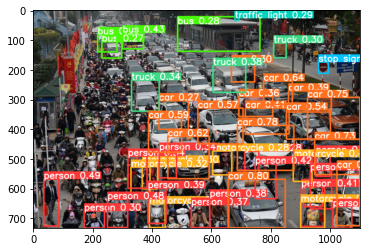

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[ 51,  85, 112],
         [ 55,  89, 114],
         [ 57,  91, 116],
         ...,
         [  7,   9,   4],
         [  8,  10,   5],
         [  7,  12,   6]],
 
        [[ 55,  87, 112],
         [ 56,  90, 115],
         [ 58,  92, 117],
         ...,
         [ 10,  12,   7],
         [ 10,  12,   7],
         [  9,  14,   8]],
 
        [[ 58,  90, 115],
         [ 61,  93, 116],
         [ 61,  93, 116],
         ...,
         [ 12,  14,   9],
         [ 12,  14,   9],
         [  9,  14,   8]],
 
        ...,
 
        [[  9,  13,  16],
         [ 11,  12,  14],
         [  6,   7,   9],
         ...,
         [  5,   4,   9],
         [  5,   4,   9],
         [  5,   4,   9]],
 
        [[  8,  12,  15],
         [ 10,  11,  13],
         [  7,   8,  10],
         ...,
         [  5,   4,   9],
         [  5,   4,   9],
         [  5,   4,   9]],
 
        [[  6,  10,  13],
         [ 10,  11,  13],
         [  7,   8,  10],
         ...,
         [  6,   6,   8],
  

# 4. Real Time Detections

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\ADMIN\anaconda3\envs\pytorch\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\ADMIN\anaconda3\envs\pytorch\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\ADMIN\anaconda3\envs\pytorch\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\ADMIN\anaconda3\envs\pytorch\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided 

# 5. Train from scratch

In [12]:
import uuid   # Unique identifier
import os
import time

In [14]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [15]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [16]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.cca88f4a-6b99-11ec-b054-7c8ae19cb884.jpg


In [17]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.ce100a36-6b99-11ec-afab-7c8ae19cb884.jpg
data\images\awake.ce100a37-6b99-11ec-83eb-7c8ae19cb884.jpg
data\images\awake.ce100a38-6b99-11ec-a00b-7c8ae19cb884.jpg
data\images\awake.ce100a39-6b99-11ec-afd9-7c8ae19cb884.jpg
data\images\awake.ce100a3a-6b99-11ec-97a5-7c8ae19cb884.jpg
data\images\awake.ce100a3b-6b99-11ec-9e4f-7c8ae19cb884.jpg
data\images\awake.ce100a3c-6b99-11ec-b6a2-7c8ae19cb884.jpg
data\images\awake.ce100a3d-6b99-11ec-8849-7c8ae19cb884.jpg
data\images\awake.ce100a3e-6b99-11ec-bdb2-7c8ae19cb884.jpg
data\images\awake.ce100a3f-6b99-11ec-89f7-7c8ae19cb884.jpg
data\images\awake.ce100a40-6b99-11ec-9a8c-7c8ae19cb884.jpg
data\images\awake.ce100a41-6b99-11ec-a3bd-7c8ae19cb884.jpg
data\images\awake.ce100a42-6b99-11ec-901f-7c8ae19cb884.jpg
data\images\awake.ce100a43-6b99-11ec-b87b-7c8ae19cb884.jpg
data\images\awake.ce103124-6b99-11ec-876b-7c8ae19cb884.jpg
data\images\awake.ce103125-6b99-11ec-899f-7c8ae19cb884.jpg
data\images\awake.ce103126-6b99-11ec-b8d7-7c8ae19cb884.j

In [18]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [19]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [20]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [21]:
import torchvision
print(torchvision.__path__)
print(torch.__path__)
print(torchvision.__version__)
print(torch.__version__)

['C:\\Users\\ADMIN\\anaconda3\\envs\\pytorch\\lib\\site-packages\\torchvision']
['C:\\Users\\ADMIN\\anaconda3\\envs\\pytorch\\lib\\site-packages\\torch']
0.11.2
1.10.1


In [22]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  v6.0-163-gd95978a torch 1.10.1 CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
TensorB

github: up to date with https://github.com/ultralytics/yolov5 
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'
Optimizer stripped from runs\train\exp23\weights\last.pt, 14.4MB
Optimizer stripped from runs\train\exp23\weights\best.pt, 14.4MB



               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:02<00:00,  1.24s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 2/2 [00:02<00:00,  1.37s/it]
                 all         40         40    0.00143      0.025   0.000848   8.48e-05

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/3 [00:00<?, ?it/s]C:\Users\ADMIN\anaconda3\envs\pytorch\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')

     2/499        0G    0.1132   0.01658   0.07843        36       320:   0%|          | 0/3 [00:03<?, ?it/s]
     2/499        0G    0.1132   0.01658   0.07843        36       320:  33%|###3      | 1/3 [00:03<00:06,  3.29s/it]C:\Users\ADMIN\anaconda3\envs\pytorch\li

# 6. Load Custom Model

In [23]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp23/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\ADMIN/.cache\torch\hub\master.zip
YOLOv5  2022-1-2 torch 1.10.1 CPU

Fusing layers... 
Model Summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [30]:
img = os.path.join('data', 'images', 'awake.8dad855a-6b99-11ec-80ef-7c8ae19cb884.jpg')

In [31]:
results = model(img)

C:\Users\ADMIN\anaconda3\envs\pytorch\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [32]:
results.print()

image 1/1: 480x640 1 awake
Speed: 12.1ms pre-process, 399.2ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


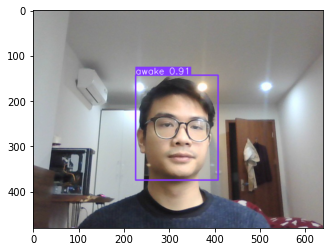

In [33]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [34]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\ADMIN\anaconda3\envs\pytorch\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\ADMIN\anaconda3\envs\pytorch\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\ADMIN\anaconda3\envs\pytorch\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\ADMIN\anaconda3\envs\pytorch\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided 